
#**<font color = "darkorange">Gene Expression and Cancer Types</font>**


##**<font color = "green">Data</font>**

In [5]:
from google.colab import drive
drive.mount("./drive", force_remount=True)

Mounted at ./drive


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [65]:
path = "./drive/My Drive/BIO310 Related Collab/"
filename= "BIO310data.csv"
df = pd.read_csv(path+filename)
df = df.rename(columns={"Unnamed: 0": "Genes"})
df=df.set_index("Genes")
df.dropna(how="any")
df.loc[:]



,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
Genes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.000000,0.0,0.000000,0.000000,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.000000,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.000000,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.000000,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.000000,0.0,0.000000,0.000000,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.000000,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.000000,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.000000,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.000000,0.0,0.000000,0.000000,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.000000,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.000000,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.000000,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.000000,0.0,0.000000,0.000000,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.000000,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.000000,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.000000,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.000000,0.0,0.000000,0.000000,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.000000,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.00000

<font color = "indigo">
Before doing anything, we dropped the NA values, in case there is any, so that our machine learning can work succesfully. As there is 801 rows, in which the one of them expresses the column information, we have 800 samples which means we have collected data from 800 cancer patients.
Moreover, there is 2052 columns (one for sample names and one for the indices), so we have 2530 genes that we measure the expression

<font>

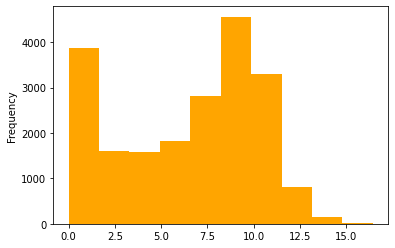

In [8]:
means =df.mean(axis = 0)
plt.figure()
means.plot.hist(bins=10, color = "orange")


In [9]:
maxx = means.max()
maxxi = means.idxmax()
print(maxxi, maxx)

gene_230 16.430441642060657


<font color = "indigo">
We can now see that the gene_230's mean expression is the highest among all samples with expression level approximately 16.43

<font>

In [71]:
filename2= "BIO310labels.csv"
df2 = pd.read_csv(path+filename2)
df2 = df2.rename(columns={"Unnamed: 0": "Samples"})
df2=df2.set_index("Samples")
print(df2.loc[:])
dg=pd.unique(df2['Class'])
print(dg)

           Class
Samples         
sample_0    PRAD
sample_1    LUAD
sample_2    PRAD
sample_3    PRAD
sample_4    BRCA
...          ...
sample_796  BRCA
sample_797  LUAD
sample_798  COAD
sample_799  PRAD
sample_800  PRAD

[801 rows x 1 columns]
['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']


<font color = "indigo">
In dataset, we have 5 unique cancers; 'PRAD' 'LUAD' 'BRCA' 'KIRC' and 'COAD'.

<font>


##**<font color = "green">K-means Clustering</font>**

In [49]:
k_list = [2,3,4,5,6,7,8,9]
k_sse= []
for k in k_list:
  kmeans= KMeans(n_clusters= k, init='k-means++', n_init=5, max_iter =300, random_state =1 ).fit(df)
  print("Best sum squared error for k =", k, "is" , kmeans.inertia_)
  k_sse.append(kmeans.inertia_)


Best sum squared error for k = 2 is 25516925.847723704
Best sum squared error for k = 3 is 21936180.612612706
Best sum squared error for k = 4 is 19480034.2459027
Best sum squared error for k = 5 is 17802165.934372354
Best sum squared error for k = 6 is 17073849.10500142
Best sum squared error for k = 7 is 16673585.355738062
Best sum squared error for k = 8 is 16418755.257616581
Best sum squared error for k = 9 is 16164840.189329093


<font color = "indigo">
Below, best sum squared error among 5 runs of the algorithm is shown for different k values. 

<font>

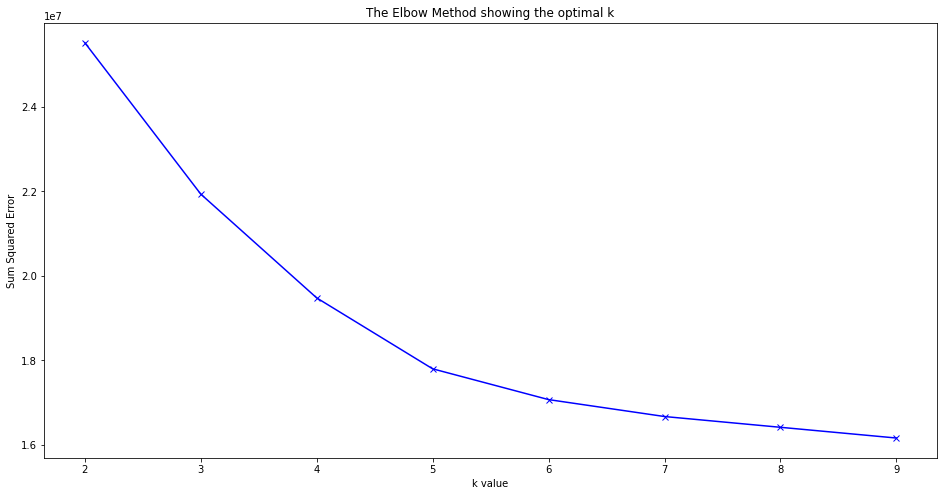

In [52]:
plt.figure(figsize=(16,8))
plt.plot(k_list, k_sse, 'bx-')
plt.xlabel('k value')
plt.ylabel('Sum Squared Error')
plt.title('The Elbow Method showing the optimal k')
plt.show()

<font color = "indigo">
To pick the best value of k, we have to select the value of k, the point after which the sum squared error start decreasing in a linear fashion. For the above elbow graph, we can say that the graph start decreasing in linear fashion after k= 6. Thus, we conclude that the optimal number of clusters for the data is 6.

<font>

In [70]:
k_list = [2,3,4,5,6,7,8,9]
k_sse= []
for k in k_list:
  cluster_labels= KMeans(n_clusters= k, init='k-means++', n_init=5, max_iter =300, random_state =1 ).fit_predict(df)
  silhouette_avg = silhouette_score(df, cluster_labels)
  print("The average silhouette width is :", silhouette_avg, "for k=", k)

The average silhouette width is : 0.1279887900401054 for k= 2
The average silhouette width is : 0.1691453108916364 for k= 3
The average silhouette width is : 0.20127932414890432 for k= 4
The average silhouette width is : 0.2245794166357534 for k= 5
The average silhouette width is : 0.22875604809637076 for k= 6
The average silhouette width is : 0.1783415501038723 for k= 7
The average silhouette width is : 0.14164147880710684 for k= 8
The average silhouette width is : 0.13483982924338853 for k= 9


<font color = "indigo">
When we calculated the average silhouette width for every k, we can see that best silhouette width is 0.22875604809637076 when k is equal to 6. Now, we'll plot the silhouette width graph for the best value of k, which is 6.

<font>

For n_clusters = 6 The average silhouette_score is : 0.22754018103249646


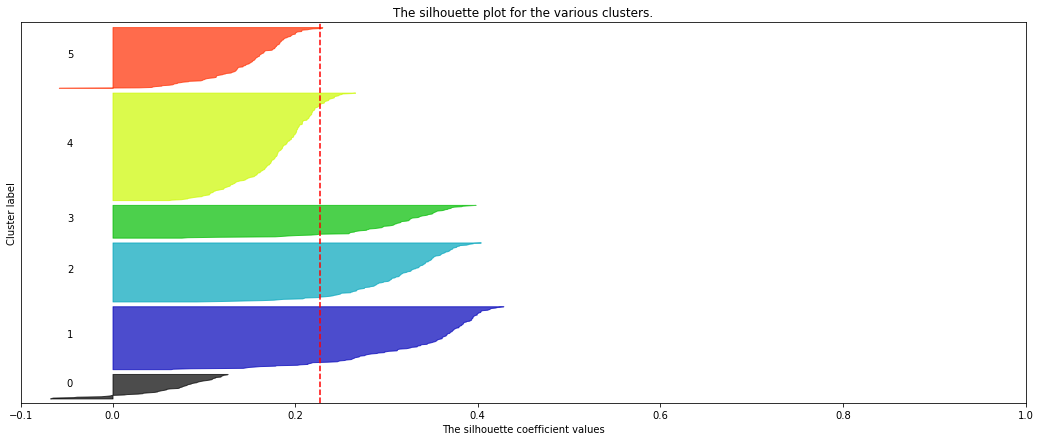

In [69]:
range_n_clusters = [6]
for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])



<font color = "indigo">
Looking at the labels.csv file (I named it BIO310labels.csv), we conclude that there are 5 unique cancers in dataset, which are 'PRAD' 'LUAD' 'BRCA' 'KIRC' and 'COAD'. Hence, we found that the optimal number of clusters is 6, thus we created 6 clusters that have similar cancer types. Although the optimal number of clusters we have chosen does not match the true number of cancer types, we can say that it is pretty close. 
<font>